In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import preproc


<h2>Heart Rates</h2>

In [2]:
results, test_stats = preproc.extract_files('HR.csv')
heart_rates = preproc.concat_results(results)

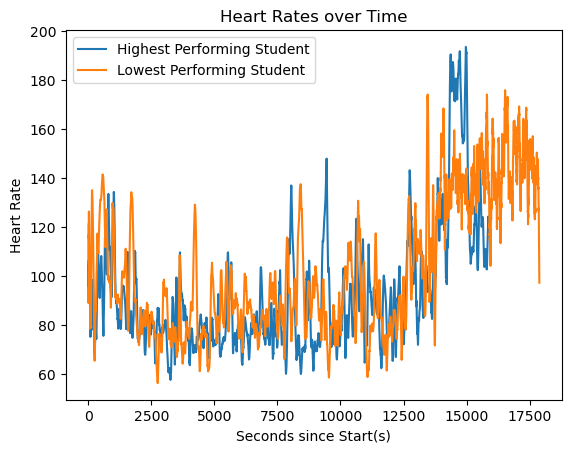

In [3]:
fig, axes = plt.subplots()
for i in [3, 7]:
    plt.plot(heart_rates.index, heart_rates[f's{i}'], label = f'Student {i}')

plt.title('Heart Rates over Time')
axes.set_xlabel('Seconds since Start(s)')
axes.set_ylabel('Heart Rate')
axes.legend(['Highest Performing Student', 'Lowest Performing Student']);

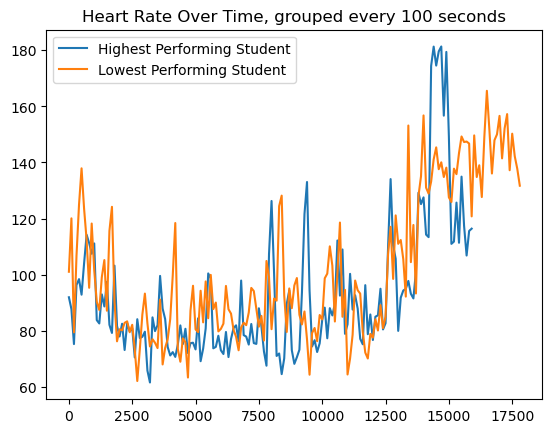

In [4]:
fig, axes = plt.subplots()
for i in [3, 7]:
    col = col = heart_rates[f's{i}'].dropna()
    # Pad with NaNs to next multiple of 100
    padding = (100 - len(col) % 100) % 100
    col = pd.concat([col, pd.Series([np.nan] * padding)], ignore_index=True)
    grouped = col.groupby(col.index // 100).mean()
    grouped.index = grouped.index * 100

    plt.plot(grouped, label = f'Student {i}')
axes.legend(['Highest Performing Student', 'Lowest Performing Student'])
plt.title('Heart Rate Over Time, grouped every 100 seconds');

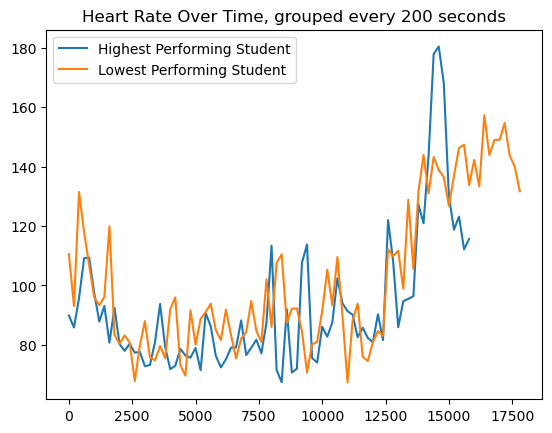

In [5]:
fig, axes = plt.subplots()
for i in [3, 7]:
    col = col = heart_rates[f's{i}'].dropna()
    # Pad with NaNs to next multiple of 100
    padding = (200 - len(col) % 200) % 200
    col = pd.concat([col, pd.Series([np.nan] * padding)], ignore_index=True)
    grouped = col.groupby(col.index // 200).mean()
    grouped.index = grouped.index * 200

    plt.plot(grouped, label = f'Student {i}')
axes.legend(['Highest Performing Student', 'Lowest Performing Student'])
plt.title('Heart Rate Over Time, grouped every 200 seconds');

<h2>Temperature</h2>

In [6]:
results, test_stats = preproc.extract_files('TEMP.csv')
temps = preproc.concat_results(results)

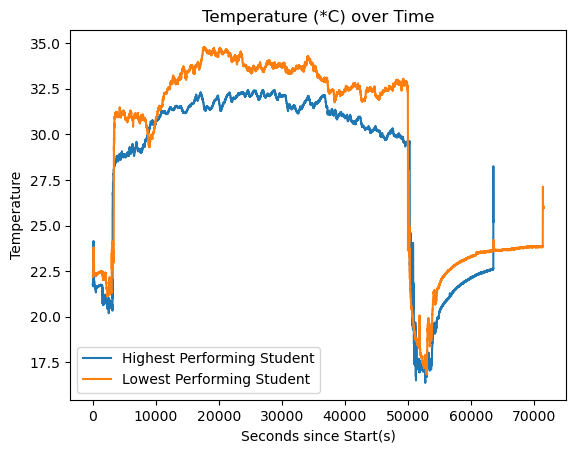

In [7]:
fig, axes = plt.subplots()
for i in [3, 7]:
    plt.plot(temps.index, temps[f's{i}'], label = f'Student {i}')

plt.title('Temperature (*C) over Time')
axes.set_xlabel('Seconds since Start(s)')
axes.set_ylabel('Temperature')
axes.legend(['Highest Performing Student', 'Lowest Performing Student']);

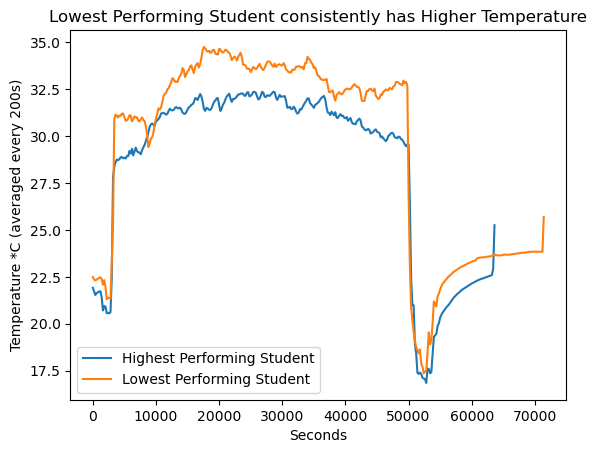

In [8]:
fig, axes = plt.subplots()
for i in [3, 7]:
    col = temps[f's{i}'].dropna()
    # Pad with NaNs to next multiple of 100
    padding = (200 - len(col) % 200) % 200
    col = pd.concat([col, pd.Series([np.nan] * padding)], ignore_index=True)
    grouped = col.groupby(col.index // 200).mean()
    grouped.index = grouped.index * 200

    plt.plot(grouped, label = f'Student {i}')
axes.legend(['Highest Performing Student', 'Lowest Performing Student'])
plt.title('Lowest Performing Student consistently has Higher Temperature')
axes.set_ylabel('Temperature *C (averaged every 200s)');
axes.set_xlabel('Seconds');

<h2> EDA </h2>

In [17]:
# hr = heart_rates.copy()
# hr.columns = [name + 'hr' for name in heart_rates.columns]
# tp = temps.copy()
# tp.columns = [name + 'c' for name in temps.columns]

In [20]:
results, test_stats = preproc.extract_files('EDA.csv')
eda = preproc.concat_results(results)

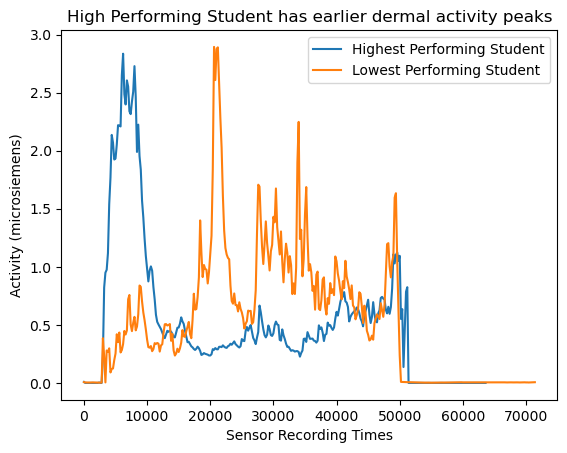

In [27]:
fig, axes = plt.subplots()
for i in [3, 7]:
    col = eda[f's{i}'].dropna()
    # Pad with NaNs to next multiple of 100
    padding = (200 - len(col) % 200) % 200
    col = pd.concat([col, pd.Series([np.nan] * padding)], ignore_index=True)
    grouped = col.groupby(col.index // 200).mean()
    grouped.index = grouped.index * 200

    plt.plot(grouped, label = f'Student {i}')
axes.legend(['Highest Performing Student', 'Lowest Performing Student'])
plt.title('High Performing Student has earlier dermal activity peaks')
axes.set_ylabel('Activity (microsiemens)');
axes.set_xlabel('Sensor Recording Times');

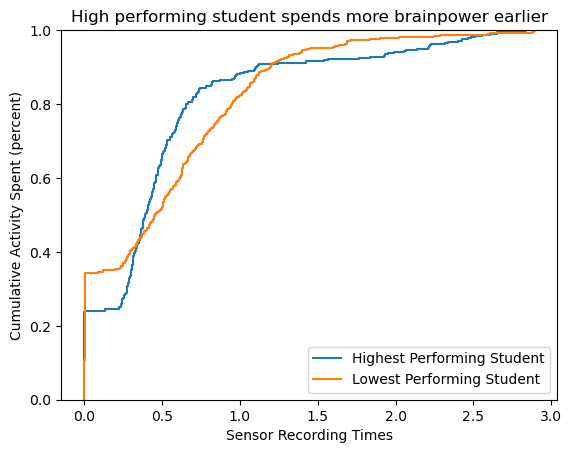

In [36]:
fig, axes = plt.subplots()
for i in [3, 7]:
    col = eda[f's{i}'].dropna()
    # Pad with NaNs to next multiple of 100
    padding = (200 - len(col) % 200) % 200
    col = pd.concat([col, pd.Series([np.nan] * padding)], ignore_index=True)
    grouped = col.groupby(col.index // 200).mean()
    grouped.index = grouped.index * 200

    plt.ecdf(grouped, label = f'Student {i}')
axes.legend(['Highest Performing Student', 'Lowest Performing Student'])
plt.title('High performing student spends more brainpower earlier')
axes.set_ylabel('Cumulative Activity Spent (percent)');
axes.set_xlabel('Sensor Recording Times');